In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial import ConvexHull
from datetime import datetime as dt
%matplotlib inline

In [5]:
#del assets, start_date, end_date, pf_data
assets = ['ITSA4.SA','PRIO3.SA','TUPY3.SA','LEVE3.SA','TAEE11.SA','MOVI3.SA','VIVT4.SA','CARD3.SA','EZTC3.SA','EGIE3.SA','CYRE3.SA','BBAS3.SA','VULC3.SA','PTBL3.SA','COGN3.SA','SHUL4.SA','LPSB3.SA','RLOG3.SA','LCAM3.SA','B3SA3.SA','PETR4.SA','TRPL4.SA','HGRE11.SA','XPML11.SA','VRTA11.SA','IRDM11.SA','HGBS11.SA','GGRC11.SA','HGRU11.SA']
start_date = dt(2017,1,1)
end_date = dt(2020,1,22)
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date, end = end_date)['Adj Close']



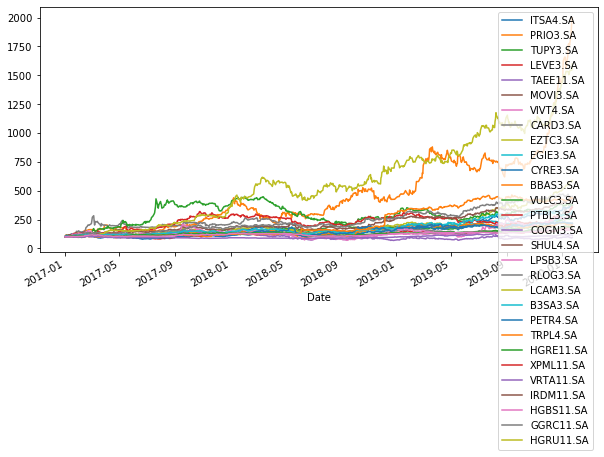

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

ITSA4.SA     0.254184
PRIO3.SA     0.983649
TUPY3.SA     0.311049
LEVE3.SA     0.211181
TAEE11.SA    0.939827
MOVI3.SA     0.354215
VIVT4.SA     0.178557
CARD3.SA     0.355786
EZTC3.SA     0.583078
EGIE3.SA     0.325867
CYRE3.SA     0.435809
BBAS3.SA     0.245110
VULC3.SA     0.432851
PTBL3.SA     0.418255
COGN3.SA    -0.018346
SHUL4.SA     0.483462
LPSB3.SA     0.328224
RLOG3.SA     0.494508
LCAM3.SA     0.910655
B3SA3.SA     0.384826
PETR4.SA     0.255984
TRPL4.SA     0.483586
HGRE11.SA    0.196556
XPML11.SA    0.172652
VRTA11.SA    0.042902
IRDM11.SA    0.141102
HGBS11.SA    0.145703
GGRC11.SA    0.082664
HGRU11.SA    0.139887
dtype: float64

In [9]:
log_returns.cov() * 250

,ITSA4.SA,PRIO3.SA,TUPY3.SA,LEVE3.SA,TAEE11.SA,MOVI3.SA,VIVT4.SA,CARD3.SA,EZTC3.SA,EGIE3.SA,...,B3SA3.SA,PETR4.SA,TRPL4.SA,HGRE11.SA,XPML11.SA,VRTA11.SA,IRDM11.SA,HGBS11.SA,GGRC11.SA,HGRU11.SA
ITSA4.SA,0.070944,0.017936,0.014893,0.014899,0.010652,0.033817,0.024236,0.036082,0.044222,0.027160,...,0.052878,0.056337,0.016934,0.005173,0.004254,0.001694,0.004432,0.004141,0.005165,0.001325
PRIO3.SA,0.017936,0.252901,0.013751,0.013978,0.010677,0.023148,0.005825,0.037886,0.024106,0.013558,...,0.025630,0.045885,0.010278,0.007066,0.007456,0.004356,0.010964,0.005246,0.004098,0.010275
TUPY3.SA,0.014893,0.013751,0.094044,0.028787,-0.005863,0.008557,0.008167,0.023640,0.015039,0.012205,...,0.019088,0.022299,0.010980,0.004366,0.001696,0.003036,0.001812,0.000348,0.003309,0.001277
LEVE3.SA,0.014899,0.013978,0.028787,0.079652,-0.000872,0.013880,0.008537,0.025553,0.024814,0.010318,...,0.017700,0.019371,0.011098,0.004419,0.002193,-0.001546,0.005860,-0.000481,0.000072,-0.003199
TAEE11.SA,0.010652,0.010677,-0.005863,-0.000872,0.013227,0.003804,0.005323,0.009354,0.002750,0.006141,...,0.004195,0.004235,0.007399,0.002513,0.002495,0.005959,0.003763,0.003694,0.002006,0.005005
MOVI3.SA,0.033817,0.023148,0.008557,0.013880,0.003804,0.138165,0.019836,0.036039,0.041514,0.023286,...,0.043318,0.043673,0.013375,0.005114,0.009122,0.001669,0.009686,0.005882,0.005519,0.000635
VIVT4.SA,0.024236,0.005825,0.008167,0.008537,0.005323,0.019836,0.044029,0.021495,0.025062,0.015482,...,0.026660,0.026592,0.014437,0.001346,0.002956,0.001141,0.000273,0.001926,0.002285,0.002480
CARD3.SA,0.036082,0.037886,0.023640,0.025553,0.009354,0.036039,0.021495,0.232310,0.040392,0.021289,...,0.044792,0.049058,0.014251,0.010198,0.008402,0.003736,0.001863,0.006300,0.006364,0.006077
EZTC3.SA,0.044222,0.024106,0.015039,0.024814,0.002750,0.041514,0.025062,0.040392,0.129355,0.028083,...,0.050742,0.054469,0.029077,0.005302,0.006373,0.003498,0.007240,0.001576,0.005873,-0.000926
EGIE3.SA,0.027160,0.013558,0.012205,0.010318,0.006141,0.023286,0.015482,0.021289,0.028083,0.045332,...,0.029810,0.028908,0.016285,0.004079,0.001825,0.002142,0.001761,0.001644,0.002793,0.001601


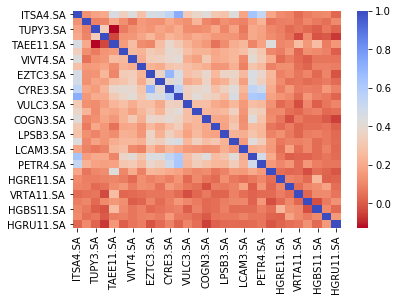

In [10]:
lrc = log_returns.corr()
sns.heatmap(lrc, annot=False, cmap='coolwarm_r')

In [11]:
num_assets = len(assets)

In [12]:
weights_media = np.array([1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets),1/len(assets)])
weights_casa = np.array(
[
0.1314,0.1161,0.0732,0.0538,0.0625,0.0356,0.0672,
0.0217,0.0167,0.0446,0.0191,0.0571,0.0200,0.0073,
0.0162,0.0096,0.0165,0.0186,0.0141,0.0135,0.0328,
0.0515,0.0166,0.0197,0.0151,0.0145,0.0120,0.0139,0.0075
]
)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights_casa
#weights
#weights_casa

array([0.1314, 0.1161, 0.0732, 0.0538, 0.0625, 0.0356, 0.0672, 0.0217,
       0.0167, 0.0446, 0.0191, 0.0571, 0.02  , 0.0073, 0.0162, 0.0096,
       0.0165, 0.0186, 0.0141, 0.0135, 0.0328, 0.0515, 0.0166, 0.0197,
       0.0151, 0.0145, 0.012 , 0.0139, 0.0075])

Expected Portfolio Return:

In [13]:
np.sum(weights * log_returns.mean()) * 250

0.3530981094002121

Expected Portfolio Variance:

In [14]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023666399472028962

In [15]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1538388750349825

In [16]:
pfolio_casa_weights = (weights_casa)
pfolio_casa_returns = (np.sum(weights_casa * log_returns.mean()) * 250)
pfolio_casa_volatilities = (np.sqrt(np.dot(weights_casa.T, np.dot(log_returns.cov() * 250, weights_casa))))
pfolio_casa_sharpe = ((np.sum(weights_casa * log_returns.mean()) * 250)/np.sqrt(np.dot(weights_casa.T, np.dot(log_returns.cov() * 250, weights_casa))))

pfolio_media_weights = (weights_media)
pfolio_media_returns = (np.sum(weights_media * log_returns.mean()) * 250)
pfolio_media_volatilities = (np.sqrt(np.dot(weights_media.T, np.dot(log_returns.cov() * 250, weights_media))))
pfolio_media_sharpe = ((np.sum(weights_media * log_returns.mean()) * 250)/np.sqrt(np.dot(weights_media.T, np.dot(log_returns.cov() * 250, weights_media))))

pfolio_returns, pfolio_volatilities, pfolio_weights, pfolio_sharpe = ([] for i in range(4))
num_portfolios= 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_weights.append(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    pfolio_sharpe.append((np.sum(weights * log_returns.mean()) * 250)/np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
#pfolio_returns = np.array(pfolio_returns)
#pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_weights = np.array(pfolio_weights)
#pfolio_sharpe = np.array(pfolio_sharpe)
#pfolio_returns, pfolio_volatilities, pfolio_sharpe, pfolio_weights

In [17]:
#portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility': pfolio_volatilities, 'Sharpe': pfolio_sharpe})

In [18]:
#plt.style.use('seaborn')
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
#plt.figure(figsize=(10,6))
#plt.scatter(x=pfolio_volatilities, y=pfolio_returns, c=pfolio_sharpe, cmap='viridis')
#plt.text(0.3, 0.5, "word", fontsize=9)
#plt.colorbar(label='Sharpe')
#sns.set(style='darkgrid')

#plt.xlabel('Expected Volatility')
#plt.ylabel('Expected Return')

In [19]:
pfolio_max = max(pfolio_sharpe)
pfolio_avg = sum(pfolio_sharpe)/len(pfolio_sharpe)
pfolio_min = min(pfolio_sharpe)

test = np.array(pfolio_sharpe)>pfolio_casa_sharpe
print(pfolio_max, pfolio_avg, pfolio_min)
print(pfolio_casa_sharpe)
print(pfolio_media_sharpe)

3.127137530146729 2.3817824166252435 1.6855197939704598
2.589499966409552
2.4255865567312345


In [20]:

group_a = np.array(pfolio_sharpe)<pfolio_casa_sharpe
count_a = np.count_nonzero(group_a)
group_b = np.array(pfolio_sharpe)>0
count_b = np.count_nonzero(group_b)
count_c = (count_a/count_b)
count_c

0.8436

In [21]:
pfolio_sharpe.index(max(pfolio_sharpe))

7449

In [22]:
pfolio_assets = pfolio_weights[pfolio_sharpe.index(max(pfolio_sharpe))]
#pfolio_assets = pfolio_weights[pfolio_sharpe.index(max(pfolio_sharpe))]

pfolio_new = pd.DataFrame({'Stocks': assets, '%': pfolio_assets})
pfolio_new

pfolio_casa_w = pfolio_casa_weights
pfolio_casa_new = pd.DataFrame({'Stocks': assets, '%': pfolio_casa_w})
pfolio_new


,Stocks,%
0,ITSA4.SA,0.034371
1,PRIO3.SA,0.066450
2,TUPY3.SA,0.062615
3,LEVE3.SA,0.049701
4,TAEE11.SA,0.069753
5,MOVI3.SA,0.024687
6,VIVT4.SA,0.077341
7,CARD3.SA,0.016350
8,EZTC3.SA,0.005935
9,EGIE3.SA,0.072489


In [23]:
pv_max = pfolio_volatilities[pfolio_sharpe.index(max(pfolio_sharpe))]
pr_max = pfolio_returns[pfolio_sharpe.index(max(pfolio_sharpe))]

pv_min = pfolio_volatilities[pfolio_sharpe.index(min(pfolio_sharpe))]
pr_min = pfolio_returns[pfolio_sharpe.index(min(pfolio_sharpe))]

pv_casa = pfolio_casa_volatilities
pr_casa = pfolio_casa_returns

pv_media = pfolio_media_volatilities
pr_media = pfolio_media_returns

pv_max, pr_max, pv_min, pr_min, pv_casa, pr_casa, pv_media, pr_media

(0.1269561718928429,
 0.3970094098098683,
 0.1741716294858249,
 0.29356972904644685,
 0.16014675775577358,
 0.41470002382917437,
 0.14605469467631646,
 0.3542683039543582)

Text(0, 0.5, 'Expected Return')

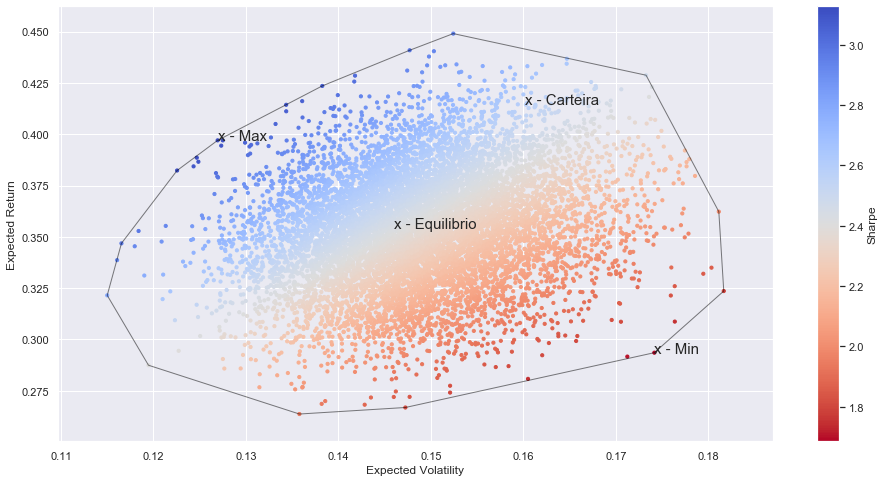

In [26]:
#plt.style.use('seaborn')
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.figure(figsize=(16,8))
plt.scatter(x=pfolio_volatilities, y=pfolio_returns, c=pfolio_sharpe, cmap='coolwarm_r', s=10)
#plt.annotate('Max', xy=(pv_max, pr_max), xytext=(pv_max+0.05,pr_max+0.05), arrowprops=dict(width=0.5, headwidth=7, facecolor='black',shrink=0.1))

def encircle(pfolio_volatilities,pfolio_returns, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[pfolio_volatilities,pfolio_returns]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

encircle(pfolio_volatilities, pfolio_returns, ec="black", fc="none", alpha=0.5)

plt.text(pv_max, pr_max, "x - Max", fontsize=15)
plt.text(pv_min, pr_min, "x - Min", fontsize=15)
plt.text(pv_casa, pr_casa, "x - Carteira", fontsize=15)
plt.text(pv_media, pr_media, "x - Equilibrio", fontsize=15)

plt.colorbar(label='Sharpe')
sns.set(style='darkgrid')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#sns.kdeplot(pfolio_volatilities, pfolio_returns, n_levels=10)
#print(pfolio_max, pfolio_avg, pfolio_min)
#print(pfolio_casa_sharpe)
#print(pfolio_media_sharpe)

In [27]:
df_chart = pd.DataFrame({'Sharpe': pfolio_sharpe})
#df_chart.sort_values('Sharpe').plot(kind='hist',bins=40,rwidth=0.8,histtype='bar')
hist = sns.distplot(df_chart, bins=20, cumulative=True)
hist

TypeError: distplot() got an unexpected keyword argument 'cumulative'

In [ ]:
#y_pos = np.arange(num_portfolios)
#plt.bar(y_pos, pfolio_sharpe, align='center', alpha=0.5)
#plt.xticks(y_pos)
#plt.ylabel('Sharpe')
#plt.show()

sharpelist = np.array(pfolio_sharpe)
plt.

In [ ]:
out_assets = ['ITSA4.SA', 'UNIP6.SA', 'VULC3.SA','LCAM3.SA','SHUL4.SA','PTBL3.SA','GUAR3.SA','CARD3.SA','BBAS3.SA','EZTC3.SA','SCAR3.SA']
out_start_date = dt(2019,1,1)
out_end_date = dt(2020,1,22)
out_pf_data = pd.DataFrame()
for a in out_assets:
    out_pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = out_start_date, end = out_end_date)['Adj Close']
#out_sapr11 = pd.read_csv(r'C:\Users\Alberto\Desktop\sapr11.csv', sep=';')
#out_sapr11['Date']=pd.to_datetime(out_sapr11['Date'], format='%d/%m/%Y')
#out_sapr11 = out_sapr11.set_index('Date')
#out_result = out_pf_data.join(out_sapr11, how='left')
#out_pf_data = out_result
#out_pf_data
#out_assets = ['ITSA4.SA', 'UNIP6.SA', 'VULC3.SA','LCAM3.SA','SHUL4.SA','PTBL3.SA','GUAR3.SA','CARD3.SA','BBAS3.SA','EZTC3.SA','SCAR3.SA','SAPR11.SA']

In [ ]:
out_log_returns = np.log(out_pf_data / out_pf_data.shift(1))

In [ ]:
resultado_estudo = np.sum(pfolio_assets * out_log_returns.mean()) * 250
resultado_estudo

In [ ]:
resultado_casa = np.sum(weights_casa * out_log_returns.mean()) * 250
resultado_casa

In [ ]:
volatilidade_estudo = (np.sqrt(np.dot(pfolio_assets.T, np.dot(out_log_returns.cov() * 250, pfolio_assets))))
volatilidade_estudo

In [ ]:
volatilidade_casa = (np.sqrt(np.dot(weights_casa.T, np.dot(out_log_returns.cov() * 250, weights_casa))))
volatilidade_casa

In [ ]:
out_log_returns